<a href="https://colab.research.google.com/github/coding-cosmos/Radial-Gate-Cavitation-Index/blob/main/Radial_Gate_Taylor_Diagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taylor Diagram


## Utils

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.projections import PolarAxes
import mpl_toolkits.axisartist.grid_finder as gf
import mpl_toolkits.axisartist.floating_axes as fa

class TaylorDiagram(object):
    def __init__(self, STD, fig=None, rect=111, label='_'):
        self.STD = STD
        tr = PolarAxes.PolarTransform()
        # Correlation labels
        rlocs = np.concatenate(((np.arange(11.0) / 10.0), [0.99]))
        tlocs = np.arccos(rlocs)  # Conversion to polar angles
        gl1 = gf.FixedLocator(tlocs)  # Positions
        tf1 = gf.DictFormatter(dict(zip(tlocs, map(str, rlocs))))
        # Standard deviation axis extent
        self.smin = 0
        self.smax = 1.20 * self.STD
        gh = fa.GridHelperCurveLinear(tr, extremes=(0, (np.pi / 2), self.smin, self.smax),
                                      grid_locator1=gl1, tick_formatter1=tf1)
        if fig is None:
            fig = plt.figure()
        ax = fa.FloatingSubplot(fig, rect, grid_helper=gh)
        fig.add_subplot(ax)
        # Angle axis
        ax.axis['top'].set_axis_direction('bottom')
        ax.axis['top'].label.set_text("coefficient of correlation")
        ax.axis['top'].toggle(ticklabels=True, label=True)
        ax.axis['top'].major_ticklabels.set_axis_direction('top')
        ax.axis['top'].label.set_axis_direction('top')
        # X axis
        ax.axis['left'].set_axis_direction('bottom')
        ax.axis['left'].label.set_text("Standard deviation")
        ax.axis['left'].toggle(ticklabels=True, label=True)
        ax.axis['left'].major_ticklabels.set_axis_direction('bottom')
        ax.axis['left'].label.set_axis_direction('bottom')
        # Y axis
        ax.axis['right'].set_axis_direction('top')
        ax.axis['right'].label.set_text("Standard deviation")
        ax.axis['right'].toggle(ticklabels=True, label=True)
        ax.axis['right'].major_ticklabels.set_axis_direction('left')
        ax.axis['right'].label.set_axis_direction('top')
        # Hide the bottom axis
        ax.axis['bottom'].set_visible(False)
        # Add grid lines
        ax.grid()
        self._ax = ax  # Graphical axes
        self.ax = ax.get_aux_axes(tr)  # Polar coordinates
        # Add reference point and STD contour
        l, = self.ax.plot([0], self.STD, 'k*', ls='', ms=12, label=label)
        t = np.linspace(0, (np.pi / 2.0))
        r = np.zeros_like(t) + self.STD
        self.ax.plot(t, r, 'b--', label='_',markersize=15)
        self.samplePoints = [l]  # Collect sample points for the legend

    def add_sample(self, STD, r, *args, **kwargs):
        l, = self.ax.plot(np.arccos(r), STD, *args, **kwargs,markersize=12)  # (theta, radius)
        self.samplePoints.append(l)
        return l

    def add_contours(self, levels=6, **kwargs):
        rs, ts = np.meshgrid(np.linspace(self.smin, self.smax), np.linspace(0, (np.pi / 2.0)))
        RMSE = np.sqrt(np.power(self.STD, 2) + np.power(rs, 2) - (2.0 * self.STD * rs * np.cos(ts)))
        contours = self.ax.contour(ts, rs, RMSE, levels, **kwargs)
        return contours

def srl(ActSTD, s, r, l, cs, markers,title):
    fig = plt.figure(figsize=(10, 8))
    dia = TaylorDiagram(ActSTD, fig=fig, rect=111, label='Experimental $C_{d}$')
    plt.clabel(dia.add_contours(colors=('blue', 'green', 'pink', 'aqua', 'purple', 'black')), inline=1, fontsize=10)

    # Plot each sample
    for (std_dev, corr, label, color, marker) in zip(s, r, l, cs, markers):
        dia.add_sample(std_dev, corr, label=label, color=color, marker=marker)

    # Position the legend outside the plot on the right side
    spl = [p.get_label() for p in dia.samplePoints]
    fig.legend(dia.samplePoints, spl, numpoints=1, prop=dict(size='small'), loc='center left', bbox_to_anchor=(0.85, 0.5))

    plt.title(title)
    plt.show()
    plt.clf()
    plt.close(fig)

## Dimensional


### Training

/tmp/ipython-input-6-1185150384.py:10: MatplotlibDeprecationWarning: Passing `apply_theta_transforms=True` (the default) is deprecated since Matplotlib 3.9. Support for this will be removed in Matplotlib in 3.11. To prevent this warning, set `apply_theta_transforms=False`, and make sure to shift theta values before being passed to this transform.
  tr = PolarAxes.PolarTransform()
/tmp/ipython-input-6-1185150384.py:70: MatplotlibDeprecationWarning: Passing `apply_theta_transforms=True` (the default) is deprecated since Matplotlib 3.9. Support for this will be removed in Matplotlib in 3.11. To prevent this warning, set `apply_theta_transforms=False`, and make sure to shift theta values before being passed to this transform.
  plt.clabel(dia.add_contours(colors=('blue', 'green', 'pink', 'aqua', 'purple', 'black')), inline=1, fontsize=10)


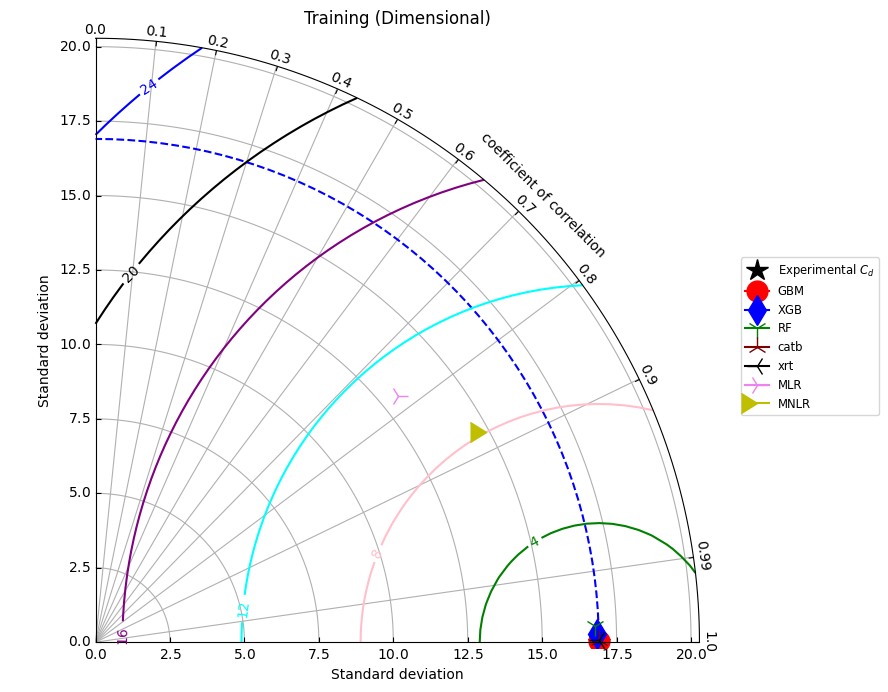

<Figure size 640x480 with 0 Axes>

In [ ]:

# Standard deviation of observed data
ActSTD = 16.901553

# Standard deviation of each predicted data
s = [16.90098371,16.85080966,16.78617776,16.89967766,16.89367947,13.09425512,14.89167213]

# The correlation coefficient of each predicted data
r = [0.9999990174,0.9998757922,0.9994890006,0.9999930676,0.9999935402,0.7747368019,0.8810830555]
l = ['GBM', 'XGB','RF', 'catb', 'xrt', 'MLR','MNLR']
cs = ['red', 'blue', 'green', 'maroon', 'black', 'violet', 'y', 'orange', 'cyan', 'dimgrey', 'teal', 'indigo',
      'salmon', 'navy', 'tan', 'tomato', 'orchid', 'lime', 'steelblue', 'indigo', 'yellow', 'midnightblue', 'darkslategrey']
markers = ['o', 'd', '1', '2', '3', '4', 5, '8', 'p', 'H', 's', '*', 'D', 'v', 'd', 'X', '^', '+', '_', '<', '>', 'P', 'X']

# Call the function to display the plot
srl(ActSTD, s, r, l, cs, markers,title="Training (Dimensional)")


### Testing

/tmp/ipython-input-8-3604639930.py:10: MatplotlibDeprecationWarning: Passing `apply_theta_transforms=True` (the default) is deprecated since Matplotlib 3.9. Support for this will be removed in Matplotlib in 3.11. To prevent this warning, set `apply_theta_transforms=False`, and make sure to shift theta values before being passed to this transform.
  tr = PolarAxes.PolarTransform()
/tmp/ipython-input-8-3604639930.py:70: MatplotlibDeprecationWarning: Passing `apply_theta_transforms=True` (the default) is deprecated since Matplotlib 3.9. Support for this will be removed in Matplotlib in 3.11. To prevent this warning, set `apply_theta_transforms=False`, and make sure to shift theta values before being passed to this transform.
  plt.clabel(dia.add_contours(colors=('blue', 'green', 'pink', 'aqua', 'purple', 'black')), inline=1, fontsize=10)


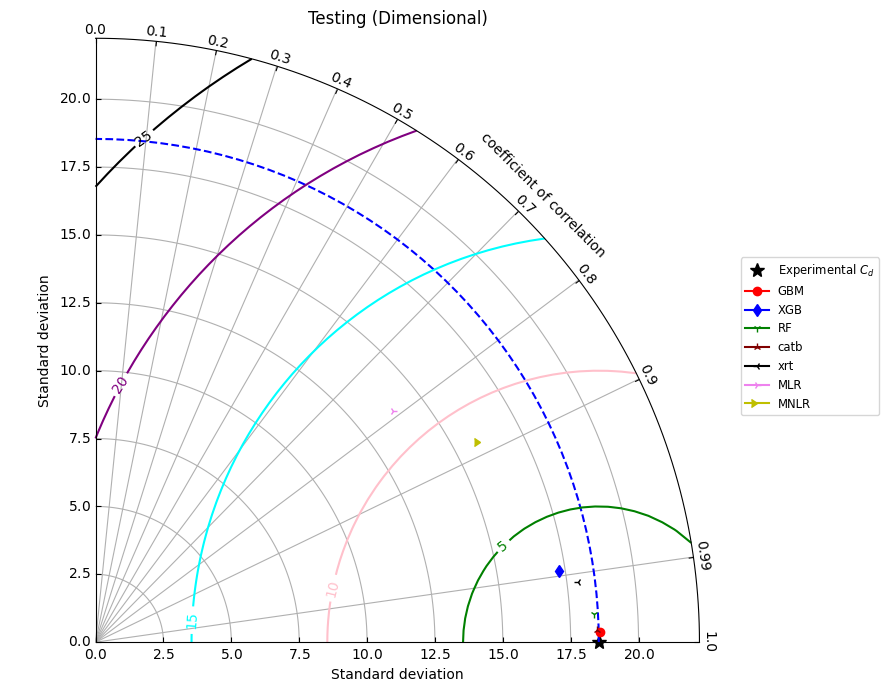

<Figure size 640x480 with 0 Axes>

In [ ]:

# Standard deviation of observed data
ActSTD = 18.5361252

# Standard deviation of each predicted data
s = [18.56844171,17.26865517,18.38150483,18.46326442,17.91763538,13.88175846,15.96177872]

# The correlation coefficient of each predicted data
r = [0.9998099229,0.9883038951,0.9984379024,0.9996925428,0.9922223371,0.790180833,0.8868581426]
l = ['GBM', 'XGB','RF', 'catb', 'xrt', 'MLR','MNLR']
cs = ['red', 'blue', 'green', 'maroon', 'black', 'violet', 'y', 'orange', 'cyan', 'dimgrey', 'teal', 'indigo',
      'salmon', 'navy', 'tan', 'tomato', 'orchid', 'lime', 'steelblue', 'indigo', 'yellow', 'midnightblue', 'darkslategrey']
markers = ['o', 'd', '1', '2', '3', '4', 5, '8', 'p', 'H', 's', '*', 'D', 'v', 'd', 'X', '^', '+', '_', '<', '>', 'P', 'X']

# Call the function to display the plot
srl(ActSTD, s, r, l, cs, markers,title='Testing (Dimensional)')


## Non Dimensional

### Training

/tmp/ipython-input-8-3604639930.py:10: MatplotlibDeprecationWarning: Passing `apply_theta_transforms=True` (the default) is deprecated since Matplotlib 3.9. Support for this will be removed in Matplotlib in 3.11. To prevent this warning, set `apply_theta_transforms=False`, and make sure to shift theta values before being passed to this transform.
  tr = PolarAxes.PolarTransform()
/tmp/ipython-input-8-3604639930.py:70: MatplotlibDeprecationWarning: Passing `apply_theta_transforms=True` (the default) is deprecated since Matplotlib 3.9. Support for this will be removed in Matplotlib in 3.11. To prevent this warning, set `apply_theta_transforms=False`, and make sure to shift theta values before being passed to this transform.
  plt.clabel(dia.add_contours(colors=('blue', 'green', 'pink', 'aqua', 'purple', 'black')), inline=1, fontsize=10)


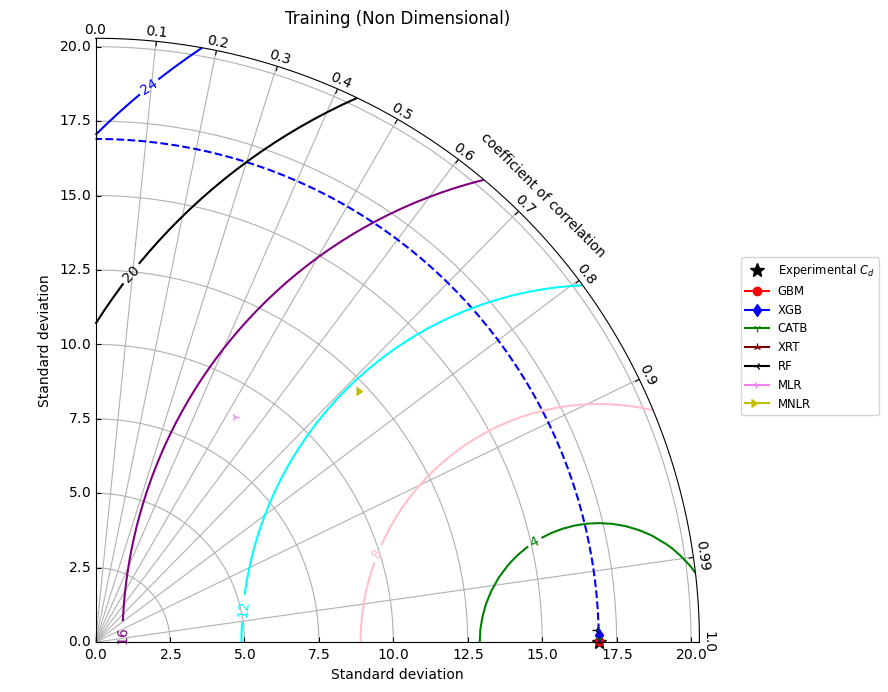

<Figure size 640x480 with 0 Axes>

In [ ]:

# Standard deviation of observed data
ActSTD = 16.901553

# Standard deviation of each predicted data
s = [16.90134829,16.89465465,16.89793407,16.90154017,16.8285179,8.906017228,12.30402128]

# The correlation coefficient of each predicted data
r = [0.9999985844,0.9999040986,0.9999797057,0.9999999982,0.999699203,0.5269348461,0.7279817012]
l = ['GBM', 'XGB','CATB', 'XRT', 'RF', 'MLR','MNLR']
cs = ['red', 'blue', 'green', 'maroon', 'black', 'violet', 'y', 'orange', 'cyan', 'dimgrey', 'teal', 'indigo',
      'salmon', 'navy', 'tan', 'tomato', 'orchid', 'lime', 'steelblue', 'indigo', 'yellow', 'midnightblue', 'darkslategrey']
markers = ['o', 'd', '1', '2', '3', '4', 5, '8', 'p', 'H', 's', '*', 'D', 'v', 'd', 'X', '^', '+', '_', '<', '>', 'P', 'X']

# Call the function to display the plot
srl(ActSTD, s, r, l, cs, markers,title='Training (Non Dimensional)')


### Testing

/tmp/ipython-input-8-3604639930.py:10: MatplotlibDeprecationWarning: Passing `apply_theta_transforms=True` (the default) is deprecated since Matplotlib 3.9. Support for this will be removed in Matplotlib in 3.11. To prevent this warning, set `apply_theta_transforms=False`, and make sure to shift theta values before being passed to this transform.
  tr = PolarAxes.PolarTransform()
/tmp/ipython-input-8-3604639930.py:70: MatplotlibDeprecationWarning: Passing `apply_theta_transforms=True` (the default) is deprecated since Matplotlib 3.9. Support for this will be removed in Matplotlib in 3.11. To prevent this warning, set `apply_theta_transforms=False`, and make sure to shift theta values before being passed to this transform.
  plt.clabel(dia.add_contours(colors=('blue', 'green', 'pink', 'aqua', 'purple', 'black')), inline=1, fontsize=10)


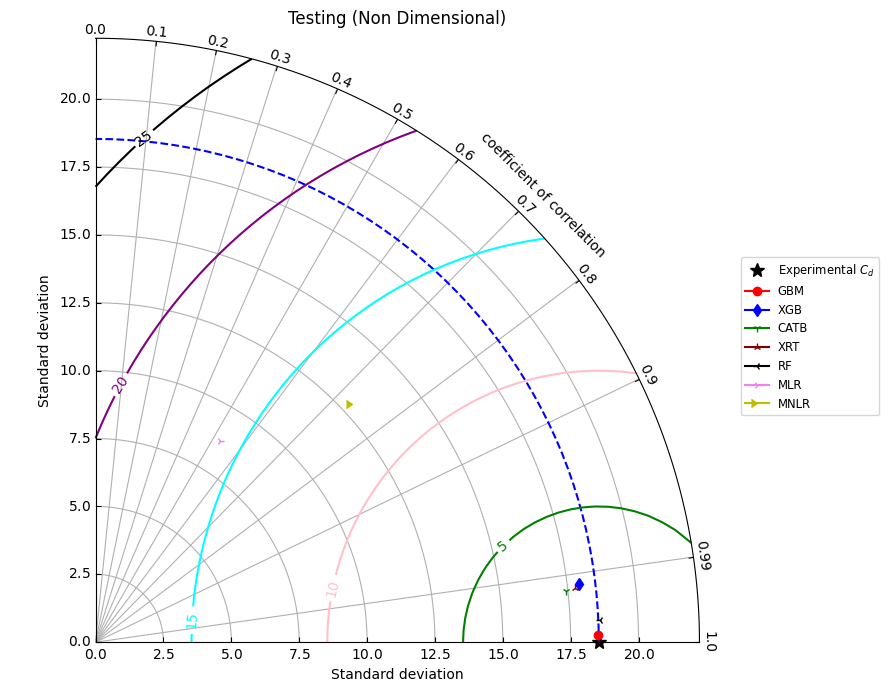

<Figure size 640x480 with 0 Axes>

In [ ]:

# Standard deviation of observed data
ActSTD = 18.5361252

# Standard deviation of each predicted data
s = [18.52465061,17.92674525,17.44147382,17.78049692,18.590693,8.706629837,12.87244174]

# The correlation coefficient of each predicted data
r = [0.9999065976,0.9928773171,0.9940254983,0.9936380063,0.9990598508,0.5261603907,0.7328741682]
l = ['GBM', 'XGB','CATB', 'XRT', 'RF', 'MLR','MNLR']
cs = ['red', 'blue', 'green', 'maroon', 'black', 'violet', 'y', 'orange', 'cyan', 'dimgrey', 'teal', 'indigo',
      'salmon', 'navy', 'tan', 'tomato', 'orchid', 'lime', 'steelblue', 'indigo', 'yellow', 'midnightblue', 'darkslategrey']
markers = ['o', 'd', '1', '2', '3', '4', 5, '8', 'p', 'H', 's', '*', 'D', 'v', 'd', 'X', '^', '+', '_', '<', '>', 'P', 'X']

# Call the function to display the plot
srl(ActSTD, s, r, l, cs, markers,title='Testing (Non Dimensional)')
